### Law of large numbers.

Law of large numbers tells us that, as we average together the individual samples, we get closer and closer to the true mean.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# simulation parameters go here
population_size = 2.3e5 # 230000

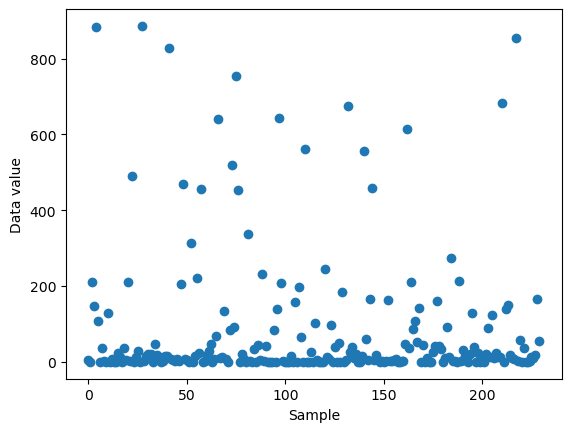

In [6]:
# generate the population of numbers
population = 1 / np.logspace(np.log10(.001), np.log10(10), int(population_size))

np.random.shuffle(population)

skip = int(1e3)
# skipping every 1000 elements, just for beautification purposes
plt.plot(population[::skip], "o")

plt.xlabel("Sample")
plt.ylabel("Data value")
plt.show()

In [7]:
# monte_carlo sampling
# get the random 50 data points from the population, get their average, and repeat this step 500 times
sample_size = 50
number_of_samples = 500
sample_means = np.zeros(number_of_samples)

In [8]:
for i in range(number_of_samples):
    random_indexes = np.random.randint(0, len(population), sample_size)

    total = 0
    for idx in random_indexes:
        total += population[idx]

    average = total/50
    sample_means[i] = average

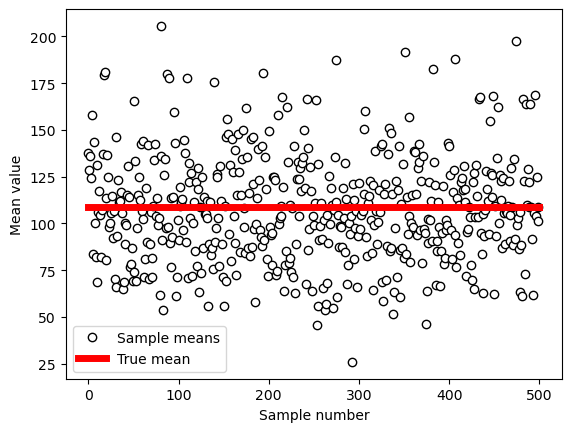

In [9]:
plt.plot(sample_means, "ko", markerfacecolor="w", label="Sample means")
# draw a line
true_mean = np.mean(population)
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r',linewidth=5, label="True mean")

plt.xlabel("Sample number")
plt.ylabel("Mean value")
plt.legend()
plt.show()

In [10]:
cumulative_average = np.cumsum(sample_means) / np.arange(1,number_of_samples+1)

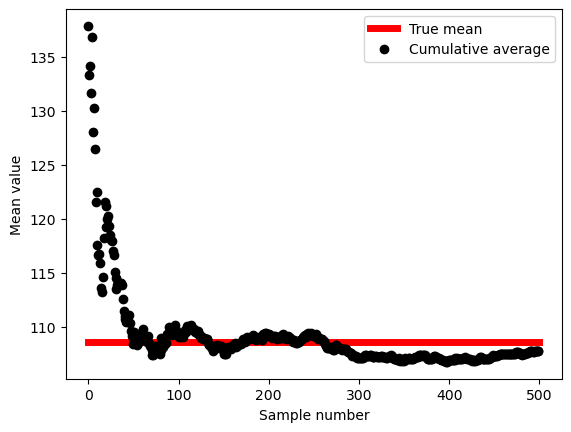

In [11]:
plt.plot([0, number_of_samples], [true_mean, true_mean], 'r', linewidth=5, label="True mean")

plt.plot(cumulative_average, 'ko', label="Cumulative average")


plt.xlabel("Sample number")
plt.ylabel("Mean value")
plt.legend()
plt.show()

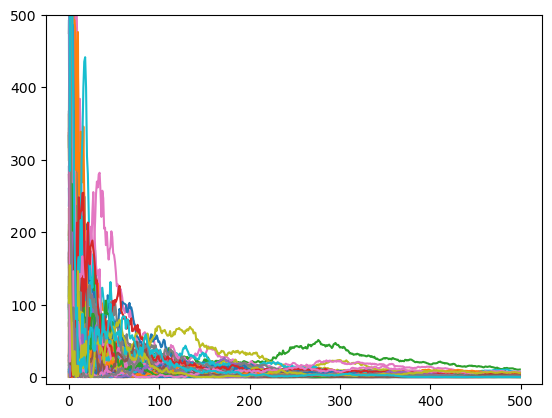

In [12]:
number_of_meta_samples = 100
cumulative_averages = np.zeros((number_of_meta_samples, number_of_samples))

for meta_i in range(number_of_meta_samples):
    for i in range(number_of_samples):
        random_indexes = np.random.randint(0, len(population), sample_size)

        total = 0
        for idx in random_indexes:
            total += population[idx]

        average = total/50
        sample_means[i] = average

    # cumulative average divergences
    temp =  np.cumsum(sample_means) / np.arange(1,number_of_samples+1)
    cumulative_averages[meta_i, :] = (temp-true_mean)**2


plt.plot(cumulative_averages.T)
plt.ylim([-10,500])
plt.show()

### Central Limit Theorem.

Tells us that the distribution of these sample means is roughly gaussian.

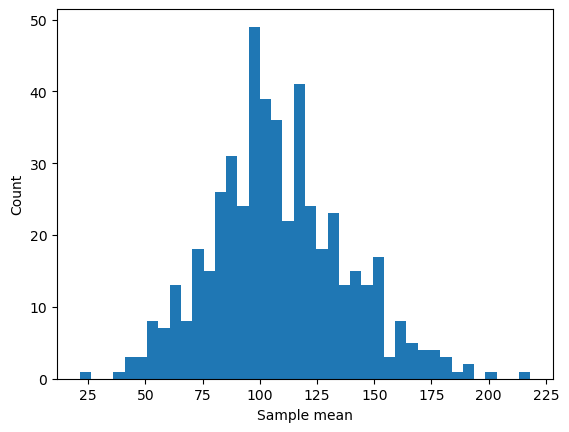

In [13]:
plt.hist(sample_means, 40)

plt.xlabel("Sample mean")
plt.ylabel("Count")
plt.show()

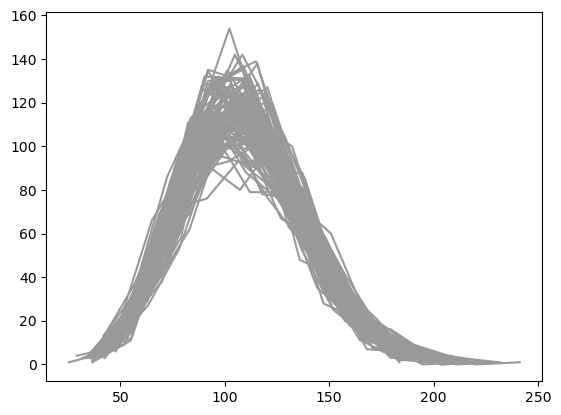

In [14]:
number_of_meta_samples = 100
all_sample_means = np.zeros((number_of_meta_samples, number_of_samples))

for meta_i in range(number_of_meta_samples):
    for i in range(number_of_samples):
        random_indexes = np.random.randint(0, len(population), sample_size)

        total = 0
        for idx in random_indexes:
            total += population[idx]

        average = total/50
        sample_means[i] = average

    # cumulative average divergences
    all_sample_means[meta_i, :] = sample_means


for i in range(len(all_sample_means)):
    y, x = np.histogram(all_sample_means[i, :])
    # take all the elements except first, then take all the elements except the last, then add then correspondingly, then divide them by 2 correspondingly
    x = (x[1:]+x[:-1])/2

    plt.plot(x,y, color=[.6,.6,.6])

plt.show()